In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('train_data.csv')
df.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


In [4]:
df.dtypes

Unnamed: 0                                       int64
id                                              object
teacher_id                                      object
teacher_prefix                                  object
school_state                                    object
project_submitted_datetime                      object
project_grade_category                          object
project_subject_categories                      object
project_subject_subcategories                   object
project_title                                   object
project_essay_1                                 object
project_essay_2                                 object
project_essay_3                                 object
project_essay_4                                 object
project_resource_summary                        object
teacher_number_of_previously_posted_projects     int64
project_is_approved                              int64
dtype: object

In [5]:
df['project_submitted_datetime']

0         2016-12-05 13:43:57
1         2016-10-25 09:22:10
2         2016-08-31 12:03:56
3         2016-10-06 21:16:17
4         2016-07-11 01:10:09
                 ...         
109243    2016-06-17 12:02:31
109244    2017-01-11 12:49:39
109245    2016-08-25 17:11:32
109246    2016-07-29 17:53:15
109247    2016-06-29 09:17:01
Name: project_submitted_datetime, Length: 109248, dtype: object

In [6]:
df['project_submitted_datetime']=pd.to_datetime(df['project_submitted_datetime'])
df['project_submitted_datetime'].dtype

dtype('<M8[ns]')

In [8]:
df['project_submission_month']=df['project_submitted_datetime'].dt.to_period('M').astype(str)


In [9]:
df[['project_submission_month', 'project_submitted_datetime']].head()

,project_submission_month,project_submitted_datetime
0,2016-12,2016-12-05 13:43:57
1,2016-10,2016-10-25 09:22:10
2,2016-08,2016-08-31 12:03:56
3,2016-10,2016-10-06 21:16:17
4,2016-07,2016-07-11 01:10:09


In [10]:
df['project_submission_hour']=df['project_submitted_datetime'].dt.hour

In [11]:
df[['project_submission_month','project_submission_hour', 'project_submitted_datetime']].head()

,project_submission_month,project_submission_hour,project_submitted_datetime
0,2016-12,13,2016-12-05 13:43:57
1,2016-10,9,2016-10-25 09:22:10
2,2016-08,12,2016-08-31 12:03:56
3,2016-10,21,2016-10-06 21:16:17
4,2016-07,1,2016-07-11 01:10:09


In [12]:
df['project_submission_weekday']=df['project_submitted_datetime'].dt.day_name()

In [13]:
df[['project_submission_month','project_submission_hour', 'project_submission_weekday','project_submitted_datetime']].head()

,project_submission_month,project_submission_hour,project_submission_weekday,project_submitted_datetime
0,2016-12,13,Monday,2016-12-05 13:43:57
1,2016-10,9,Tuesday,2016-10-25 09:22:10
2,2016-08,12,Wednesday,2016-08-31 12:03:56
3,2016-10,21,Thursday,2016-10-06 21:16:17
4,2016-07,1,Monday,2016-07-11 01:10:09


In [14]:
monthly_approval_rate=df.groupby(['project_submission_month'])['project_is_approved'].mean().reset_index()
monthly_approval_rate.sort_values(by='project_is_approved', ascending=False)

,project_submission_month,project_is_approved
7,2016-11,0.867003
1,2016-05,0.866480
0,2016-04,0.865476
8,2016-12,0.864192
10,2017-02,0.861992
11,2017-03,0.857916
2,2016-06,0.856491
9,2017-01,0.853101
6,2016-10,0.850982
4,2016-08,0.846096


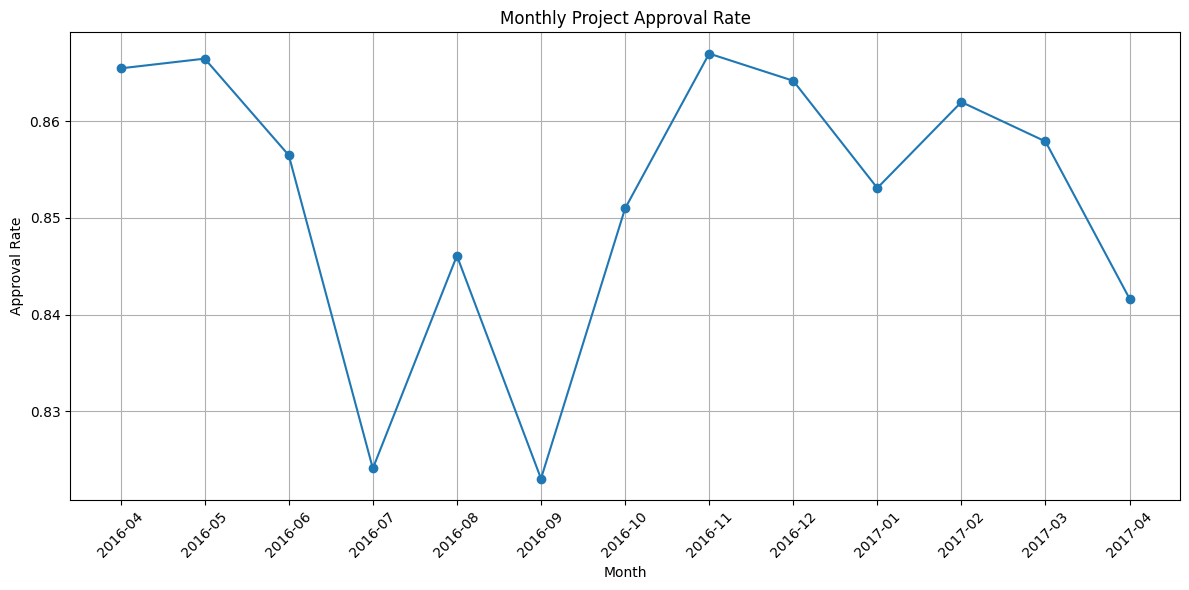

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_approval_rate['project_submission_month'], monthly_approval_rate['project_is_approved'], marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Project Approval Rate')
plt.xlabel('Month')
plt.ylabel('Approval Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

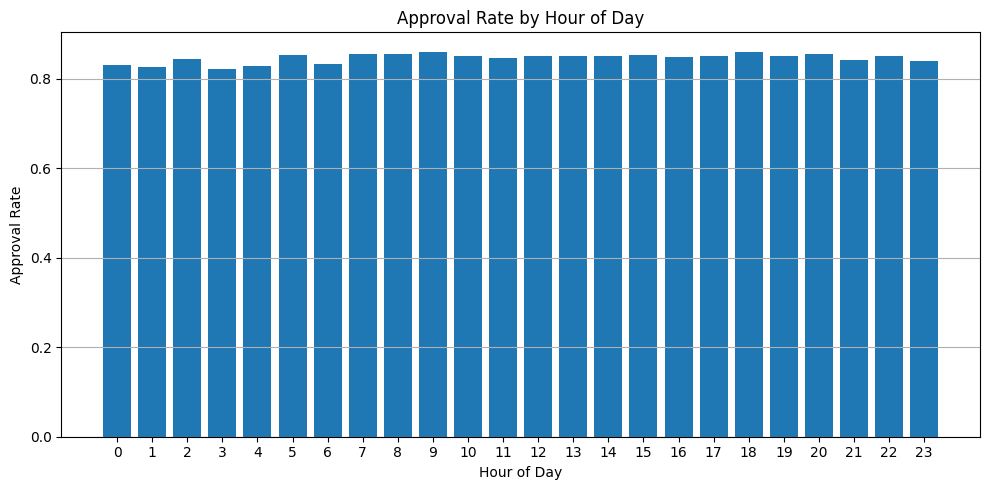

In [16]:
hourly_approval = df.groupby('project_submission_hour')['project_is_approved'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(hourly_approval['project_submission_hour'], hourly_approval['project_is_approved'])
plt.title('Approval Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Approval Rate')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

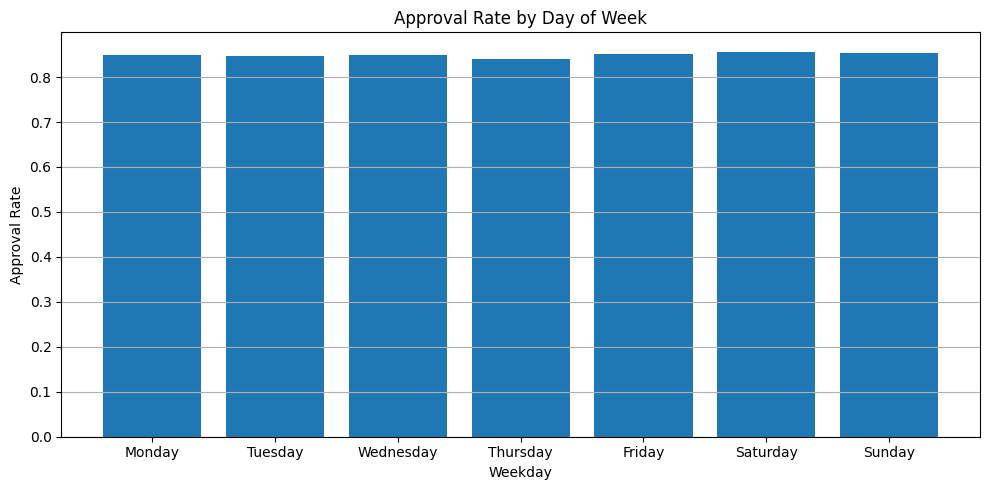

In [34]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_approval = df.groupby('project_submission_weekday')['project_is_approved'].mean().reindex(weekday_order).reset_index()

plt.figure(figsize=(10, 5))
plt.bar(weekday_approval['project_submission_weekday'], weekday_approval['project_is_approved'])
plt.title('Approval Rate by Day of Week')
plt.xlabel('Weekday')
plt.ylabel('Approval Rate')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
